In [21]:
from sklearn.utils import shuffle
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import models
from collections import Counter

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
# train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


x, y = shuffle(train_images, train_labels, random_state=15)
x_train = x[0:100]
y_train = y[0:100].reshape(-1, 1)
y_train = to_categorical(y_train) 

In [9]:
Counter(y[0:100])

Counter({0: 7, 1: 12, 2: 11, 3: 8, 4: 12, 5: 8, 6: 12, 7: 13, 8: 8, 9: 9})

# Without augmentation

In [22]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

mcp = ModelCheckpoint("models/baseline_best.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [23]:
history = model.fit(x_train, y_train, validation_data=(test_images, test_labels), epochs=60, callbacks=[mcp])

Train on 100 samples, validate on 10000 samples
Epoch 1/60
100/100 [==============================] - 2s 15ms/step - loss: 3.6802 - acc: 0.1400 - val_loss: 2.0645 - val_acc: 0.3786
Epoch 2/60
100/100 [==============================] - 1s 6ms/step - loss: 1.8386 - acc: 0.4100 - val_loss: 1.4612 - val_acc: 0.5555
Epoch 3/60
100/100 [==============================] - 1s 6ms/step - loss: 1.2401 - acc: 0.5900 - val_loss: 1.1006 - val_acc: 0.6900
Epoch 4/60
100/100 [==============================] - 1s 5ms/step - loss: 0.9662 - acc: 0.6300 - val_loss: 0.9554 - val_acc: 0.7195
Epoch 5/60
100/100 [==============================] - 1s 6ms/step - loss: 0.6270 - acc: 0.8100 - val_loss: 0.7930 - val_acc: 0.7595
Epoch 6/60
100/100 [==============================] - 1s 6ms/step - loss: 0.7186 - acc: 0.7300 - val_loss: 0.7892 - val_acc: 0.7342
Epoch 7/60
100/100 [==============================] - 1s 6ms/step - loss: 0.6074 - acc: 0.8000 - val_loss: 0.8007 - val_acc: 0.7388
Epoch 8/60
100/100 [=======

### best accuracy

In [24]:
test_model = load_model("models/baseline_best.h5")
test_loss, test_acc = test_model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 82us/step


0.9012

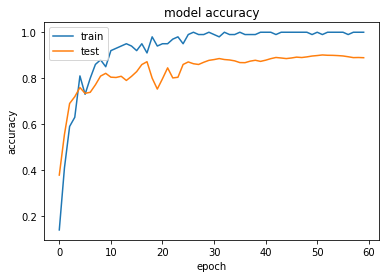

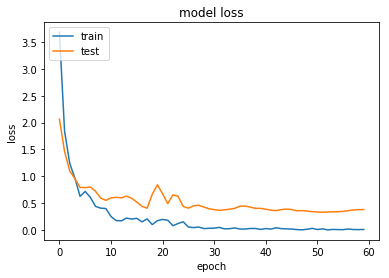

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# With augmentation

In [46]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

mcp = ModelCheckpoint("models/baseline_aug_best.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto')

model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [47]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1)  # randomly flip images

datagen.fit(x_train)

In [48]:
history2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                    epochs = 45, callbacks=[mcp],
                    validation_data = (test_images,test_labels),
                    verbose = 1, steps_per_epoch=20)

Epoch 1/45
20/20 [==============================] - 7s 356ms/step - loss: 2.5165 - acc: 0.2541 - val_loss: 1.6304 - val_acc: 0.4816
Epoch 2/45
20/20 [==============================] - 6s 281ms/step - loss: 1.5903 - acc: 0.4611 - val_loss: 0.7957 - val_acc: 0.7470
Epoch 3/45
20/20 [==============================] - 5s 274ms/step - loss: 1.0906 - acc: 0.6408 - val_loss: 0.6105 - val_acc: 0.8109
Epoch 4/45
20/20 [==============================] - 6s 275ms/step - loss: 0.8692 - acc: 0.7088 - val_loss: 0.5953 - val_acc: 0.8174
Epoch 5/45
20/20 [==============================] - 5s 274ms/step - loss: 0.7256 - acc: 0.7595 - val_loss: 0.7758 - val_acc: 0.7800
Epoch 6/45
20/20 [==============================] - 5s 274ms/step - loss: 0.6013 - acc: 0.7722 - val_loss: 0.4874 - val_acc: 0.8590
Epoch 7/45
20/20 [==============================] - 6s 275ms/step - loss: 0.5787 - acc: 0.8373 - val_loss: 0.5703 - val_acc: 0.8326
Epoch 8/45
20/20 [==============================] - 6s 279ms/step - loss: 0.

### Best accuracy

In [49]:
test_model = load_model("models/baseline_aug_best.h5")
test_loss, test_acc = test_model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 124us/step


0.9502

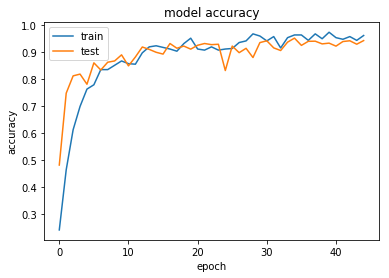

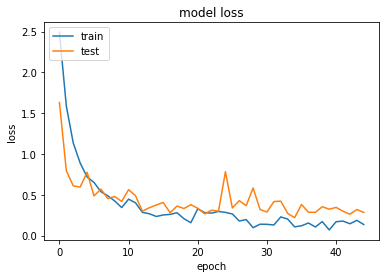

In [50]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()